# Проект 3 Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
#Описание данных:
#total_images — число фотографий квартиры в объявлении
#last_price — цена на момент снятия с публикации
#total_area — площадь квартиры в квадратных метрах (м²)
#first_day_exposition — дата публикации
#rooms — число комнат
#ceiling_height — высота потолков (м)
#floors_total — всего этажей в доме
#living_area — жилая площадь в квадратных метрах(м²)
#floor — этаж
#is_apartment — апартаменты (булев тип)

#studio — квартира-студия (булев тип)
#open_plan — свободная планировка (булев тип)

#kitchen_area — площадь кухни в квадратных метрах (м²)
#balcony — число балконов
#locality_name — название населённого пункта
#airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
#cityCenters_nearest — расстояние до центра города (м)
#parks_around3000 — число парков в радиусе 3 км
#parks_nearest — расстояние до ближайшего парка (м)
#ponds_around3000 — число водоёмов в радиусе 3 км
#ponds_nearest — расстояние до ближайшего водоёма (м)
#days_exposition — сколько дней было размещено объявление (от публикации до снятия)

data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


### Вывод

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Мы импортировали данные. Обнаружили, что имеем много пропусков в нужных столбцах и неправильные типы данных, нужно заняться предобработкой прежде, чем делать что-либо ещё.

##### первоначально, до начала обработки data, data.info() дало нам информацию о данных:

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 22 columns):

total_images            23699 non-null int64 #total_images — число фотографий квартиры в объявлении

last_price              23699 non-null float64 #last_price — цена на момент снятия с публикации

total_area              23699 non-null float64 #total_area — площадь квартиры в квадратных метрах (м²)

first_day_exposition    23699 non-null object #first_day_exposition — дата публикации

rooms                   23699 non-null int64 #rooms — число комнат

ceiling_height          14504 non-null float64 #ceiling_height — высота потолков (м) 

floors_total            23613 non-null float64 #floors_total — всего этажей в доме

living_area             21796 non-null float64 #living_area — жилая площадь в квадратных метрах(м²)

floor                   23699 non-null int64 #floor — этаж

is_apartment            2775 non-null object #is_apartment — апартаменты (булев тип)

studio                  23699 non-null bool #studio — квартира-студия (булев тип)

open_plan               23699 non-null bool #open_plan — свободная планировка (булев тип)

kitchen_area            21421 non-null float64 #kitchen_area — площадь кухни в квадратных метрах (м²)

balcony                 12180 non-null float64 #balcony — число балконов

locality_name           23650 non-null object #locality_name — название населённого пункта

airports_nearest        18157 non-null float64 #airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest     18180 non-null float64 #cityCenters_nearest — расстояние до центра города (м)

parks_around3000        18181 non-null float64 #parks_around3000 — число парков в радиусе 3 км

parks_nearest           8079 non-null float64 #parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000        18181 non-null float64 #ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest           9110 non-null float64 #ponds_nearest — расстояние до ближайшего водоёма (м)

days_exposition      20518 non-null float64 #days_exposition — сколько дней было размещено объявление (от публикации до снятия)

#### Пропуски есть в:

ceiling_height          14504 non-null float64 #ceiling_height — высота потолков (м) 

floors_total            23613 non-null float64 #floors_total — всего этажей в доме

living_area             21796 non-null float64 #living_area — жилая площадь в квадратных метрах(м²)

is_apartment            2775 non-null object #is_apartment — апартаменты (булев тип)

kitchen_area            21421 non-null float64 #kitchen_area — площадь кухни в квадратных метрах (м²)

balcony                 12180 non-null float64 #balcony — число балконов

locality_name           23650 non-null object #locality_name — название населённого пункта

airports_nearest        18157 non-null float64 #airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

cityCenters_nearest     18180 non-null float64 #cityCenters_nearest — расстояние до центра города (м)

parks_around3000        18181 non-null float64 #parks_around3000 — число парков в радиусе 3 км

parks_nearest           8079 non-null float64 #parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000        18181 non-null float64 #ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest           9110 non-null float64 #ponds_nearest — расстояние до ближайшего водоёма (м)

days_exposition      20518 non-null float64 #days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [146]:
# часть работы с пропусками перенесена сюда для удобства:

#Приведём данные в более единый формат, методом приведения к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()


# по заданию нужно заменить тип данных:
data['last_price'] = data['last_price'].astype('int')
#data['floors_total'] = data['floors_total'].astype('int')
#data['parks_around3000'] = data['parks_around3000'].astype('int')
#data['ponds_around3000'] = data['ponds_around3000'].astype('int')
#data['days_exposition'] = data['days_exposition'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#избавляем от дубликатов:
data = data.drop_duplicates().reset_index(drop = True)

# работа с locality_name — название населённого пункта
# изучим строки с пустыми значениями в locality_name:
#print(data.loc[data['locality_name'].isnull()])        
# Для многих строк из этого среза указанно расстояние до центра города, и другие данные о рассположении
# Недостаточно данных, чтобы понять как точно заполнить пропуски, значения могли быть просто не указанны, так и заполним:
data['locality_name'] = data['locality_name'].fillna('Не_указанно')

In [147]:
# Заметил что есть "Кудрово" и "Деревня Кудрово", нужно провести стандартизацию значений:
# Сперва произведём леммизацию:
from pymystem3 import Mystem
m = Mystem()
def add_lemmatize_locality_name(data):
    lemmas = m.lemmatize(data['locality_name'])
    return lemmas
data['lemmatize_locality_name'] = data.apply(add_lemmatize_locality_name, axis=1)
#print('сумма всех найденных уникальных значений',data['type_locality_name'].value_counts().sum())
#print(data['type_locality_name'].value_counts().head(30))
# Продолжим стандартизацию:
def add_type_locality_name(data):
    lemmatize_locality_name = data['lemmatize_locality_name']
    if ('санкт-петербург') in lemmatize_locality_name:
        return 'санкт-петербург'
    if ('муриный') in lemmatize_locality_name:
        return 'муринно'
    if ('шушары') in lemmatize_locality_name:
        return 'шушары'
    if ('всеволожск') in lemmatize_locality_name:
        return 'всеволожск'
    if ('пушкин') in lemmatize_locality_name:
        return 'пушкин'
    if ('колпино') in lemmatize_locality_name:
        return 'колпино'
    if ('парголовый') in lemmatize_locality_name:
        return 'парголовый' 
    if ('гатчина') in lemmatize_locality_name:
        return 'гатчина' 
    if ('кудрово') in lemmatize_locality_name:
        return 'кудрово' 
    if ('выборг') in lemmatize_locality_name:
        return 'выборг' 
    if ('петергоф') in lemmatize_locality_name:
        return 'петергоф' 
    if ('сестрорецк') in lemmatize_locality_name:
        return 'сестрорецк' 
    if ('красный') in lemmatize_locality_name:
        return 'красное_село' 
    if ('девяткино') in lemmatize_locality_name:
        return 'новое_девяткино' 
    if ('сертолово') in lemmatize_locality_name:
        return 'сертолово' 
    if ('ломоносов') in lemmatize_locality_name:
        return 'ломоносов' 
    if ('кириши') in lemmatize_locality_name:
        return 'кириши' 
    if ('бугор') in lemmatize_locality_name:
        return 'поселок_бугры' 
    if ('сланцы') in lemmatize_locality_name:
        return 'сланцы' 
    if ('волхов') in lemmatize_locality_name:
        return 'волхов' 
    if ('кингисепп') in lemmatize_locality_name:
        return 'кингисепп' 
    if ('тосно') in lemmatize_locality_name:
        return 'тосно' 
    if ('кронштадт') in lemmatize_locality_name:
        return 'кронштадт' 
    if ('никольское') in lemmatize_locality_name:
        return 'никольское' 
    if ('коммунар') in lemmatize_locality_name:
        return 'коммунар' 
    if ('сосновый') in lemmatize_locality_name:
        return 'сосновый_бор' 
    if ('кировск') in lemmatize_locality_name:
        return 'кировск' 
    if ('отрадный') in lemmatize_locality_name:
        return 'отрадный' 
    if ('янино') in lemmatize_locality_name:
        return 'посёлок_янино'  
    if ('приозерск') in lemmatize_locality_name:
        return 'приозерск'
    if ('не') in lemmatize_locality_name:
        return 'не_указанно'
    else: return data['locality_name']    

data['type_locality_name'] = data.apply(add_type_locality_name, axis=1)
#print('сумма всех найденных уникальных значений',data['type_locality_name'].value_counts().sum())
#print(data['type_locality_name'].value_counts().head(60))
#print(data['type_locality_name'].value_counts().tail(60))  
#Большенство значений приведены к стандарту. 
data['locality_name'] = data['type_locality_name']

# Удалим не нужные столбцы:
del data['lemmatize_locality_name']
del data['type_locality_name']

data['locality_name'].value_counts()

санкт-петербург        15721
муринно                  590
кудрово                  472
шушары                   440
всеволожск               398
                       ...  
деревня терпилицы          1
деревня пчева              1
посёлок левашово           1
деревня чудской бор        1
поселок возрождение        1
Name: locality_name, Length: 353, dtype: int64

### Шаг 2. Предобработка данных

In [148]:
# посмотрим какие есть уникальные значения:
#data['ceiling_height'].value_counts()      # высота потолков (м) 
#data['floors_total'].value_counts()         # всего этажей в доме
#data['living_area'].value_counts()         # жилая площадь в квадратных метрах(м²)
#data['is_apartment'].value_counts()        # апартаменты (булев тип)
#data['kitchen_area'].value_counts()        # площадь кухни в квадратных метрах (м²)
#data['balcony'].value_counts()             # число балконов
#data['locality_name'].value_counts()       # название населённого пункта
#data['airports_nearest'].value_counts()    # расстояние до ближайшего аэропорта в метрах (м)
#data['cityCenters_nearest'].value_counts() # расстояние до центра города (м)
#data['parks_around3000'].value_counts()    # число парков в радиусе 3 км
#data['parks_nearest'].value_counts()       # расстояние до ближайшего парка (м)
#data['ponds_around3000'].value_counts()    # число водоёмов в радиусе 3 км
#data['ponds_nearest'].value_counts()       # расстояние до ближайшего водоёма (м)
#data['days_exposition'].value_counts()     # сколько дней было размещено объявление (от публикации до снятия)

In [150]:
                                    # работа с ceiling_height - высота потолков
# есть аномально высокие потолки
# посмотрим на них:
#data.loc[data['ceiling_height']>6]['ceiling_height'].value_counts()
# аномально большие потолки - избавимся от аномалий:
high_ceilings = data.loc[data['ceiling_height']>6]
data.loc[high_ceilings.index,'ceiling_height'] = data['ceiling_height'].median()
# изучим строки с пустыми значениями в ceiling_height:
#print(data.loc[data['ceiling_height'].isnull()])
# заполним пустые значения:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].value_counts()

2.65    9900
2.50    3515
2.60    1646
2.70    1574
3.00    1112
        ... 
4.37       1
5.60       1
3.58       1
4.25       1
3.68       1
Name: ceiling_height, Length: 170, dtype: int64

In [151]:
                                    # работа с floors_total всего этажей в доме
# Самый высокий жилой дом Петербурга – 37 этажей. значит есть аномальные данные, заменим их:
top_floor = data.loc[data['floors_total']>37]
data.loc[top_floor.index,'floors_total'] = data['floors_total'].median()
# изучим строки с пустыми значениями в floors_total:
# print(data.loc[data['floors_total'].isnull()])
# Квартиры - это квартиры, а не дом - там должны быть этажи, заполним пропущенные значения:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'].value_counts()

5.0     5788
9.0     3849
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
33.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [152]:
                                    # работа с living_area жилая площадь в квадратных метрах(м²)
# изучим строки с пустыми значениями в floors_total:
#print(data.loc[data['living_area'].isnull()])
# строки отличаются по total_area, много пропусков в столбце kitchen_area
# в дальнейшем потребуется найти соотношение жилой и общей площади, а также отношение площади кухни к общей
# Мы будем искать значения по строкам, где есть значения всех площадей, затем из соотношения сможем заполнить пропуски
# Методом умножения total_area на коэффициент среднего соотношения жилой площади к общей площади и для кухни соответственно
mean_koef_living = 0.5647655216993234 # Данные взяты из расчётов 
non_living_area_data = data.loc[data['living_area'].isnull()]
data['living_area'] = data['living_area'].fillna(data['total_area']*mean_koef_living)
data['living_area'].value_counts()

18.000000     882
17.000000     675
30.000000     598
16.000000     486
20.000000     481
             ... 
104.481622      1
15.540000       1
28.230000       1
30.099998       1
19.642545       1
Name: living_area, Length: 2441, dtype: int64

In [78]:
                                    # работа с is_apartment апартаменты (булев тип)
# изучим какие квартиры относятся к аппартаментам, для того, найти критерии и отталкиваясь от них заполнить пропуски
# print(data.loc[data['is_apartment'] == True])
# Отличительных признаков обнаружить - не удалось, но мы будем иследовать дальше
# изучим строки с пустыми значениями в is_apartment:
# print(data.loc[data['is_apartment'].isnull()])
# апартаменты - определённый юридический статус, исходя из этого
# Недостаточно данных, чтобы заполнить пропуски

In [153]:
                                    # работа с kitchen_area площадь кухни в квадратных метрах (м²)
# изучим строки с пустыми значениями в kitchen_area:
# print(data.loc[data['kitchen_area'].isnull()])
# Ничего примечательного мы не обнаружили
# в дальнейшем потребуется найти соотношение жилой и общей площади, а также отношение площади кухни к общей
# Мы будем искать значения по строкам, где есть значения всех площадей, затем из соотношения сможем заполнить пропуски
# Методом умножения total_area на коэффициент среднего соотношения жилой площади к общей площади и для кухни соответственно
mean_koef_kitchen = 0.1873547387717406 # Данные взяты из расчётов 
non_kitchen_area_data = data.loc[data['kitchen_area'].isnull()]
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*mean_koef_kitchen)
data['kitchen_area'].value_counts()

6.000000     1300
10.000000    1262
8.000000     1110
9.000000     1101
7.000000     1062
             ... 
9.110000        1
33.723853       1
8.241735        1
28.103211       1
19.353745       1
Name: kitchen_area, Length: 1693, dtype: int64

In [154]:
                                    # работа с balcony - число балконов
# изучим строки с пустыми значениями в balcony:
#print(data.loc[data['balcony'].isnull()])    
# Ничего примечатльного, если человек не указал число балконов — скорее всего, их нет.
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [155]:
                                    # работа с airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
# изучим строки с пустыми значениями в airports_nearest:
#print(data.loc[data['airports_nearest'].isnull()])            
# Пропуски есть в небольших населённых пунктах, посмотрим в каких:
#non_airports_nearest = data.loc[data['airports_nearest'].isnull()]
#non_airports_nearest['locality_name'].value_counts()
# Попробуем посмотреть список уникальных значений для населённых пунктов, где есть пропуски в airports_nearest:
# Создадим самые массовые срезы:
myrino_data = data.loc[data['locality_name']=='муринно']
vsevolozhsk_data = data.loc[data['locality_name']=='всеволожск']
gatchina_data = data.loc[data['locality_name']=='гатчина']
kudrovo_data = data.loc[data['locality_name']=='кудрово']
vyborg_data = data.loc[data['locality_name']=='выборг']
# по всей видимости в посёлках не указывают ближайшее расстояние до аэропорта, так как аэропорты находятся в ближайшем городе
# заполним пропуски исходя из среднего расстояния от насёленного пункта до аэропорта:
data.loc[myrino_data.index,'airports_nearest'] = data['airports_nearest'].fillna(42800)
data.loc[vsevolozhsk_data.index,'airports_nearest'] = data['airports_nearest'].fillna(44100)
data.loc[gatchina_data.index,'airports_nearest'] = data['airports_nearest'].fillna(33400)
data.loc[kudrovo_data.index,'airports_nearest'] = data['airports_nearest'].fillna(25500)
data.loc[vyborg_data.index,'airports_nearest'] = data['airports_nearest'].fillna(156900)

data['airports_nearest'].value_counts()

42800.0     588
25500.0     472
44100.0     398
33400.0     308
156900.0    237
           ... 
24960.0       1
48310.0       1
20196.0       1
44097.0       1
14579.0       1
Name: airports_nearest, Length: 8279, dtype: int64

In [156]:
                                    # работа с cityCenters_nearest — расстояние до центра города в метрах (м)
# изучим строки с пустыми значениями в cityCenters_nearest:
# print(data.loc[data['cityCenters_nearest'].isnull()])
# выделяются опять маленькие населённые пункты: посёлки и деревни
non_cityCenters_nearest = data.loc[data['cityCenters_nearest'].isnull()]
# посмотрим на уникальные значения locality_name в срезе, где в cityCenters_nearest - пропуск:
# non_cityCenters_nearest['locality_name'].value_counts()
# Большенство пропусков в посёлках, деревнях и в пригородах СПБ
# Заменим их пропуски на расстояние от населённого пункта до СПБ:
data.loc[myrino_data.index,'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(19000)
data.loc[vsevolozhsk_data.index,'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(22000)
data.loc[gatchina_data.index,'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(47000)
data.loc[kudrovo_data.index,'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(11000)
# Выборг трогать не будем, так как сильно большое расстояние до СПБ:
# создастся неверная корреляция между стоимостью жилья и расстоянием. Квартиры в Выборге - это не квартиры в мухосранске
spb_data = data.loc[data['locality_name']=='санкт-петербург']
median_spb_cityCenters_nearest = spb_data['cityCenters_nearest'].median()
data.loc[spb_data.index,'cityCenters_nearest'] = data['cityCenters_nearest'].fillna(median_spb_cityCenters_nearest)

data['cityCenters_nearest'].value_counts()

19000.0    588
11000.0    472
22000.0    398
47000.0    307
8460.0      61
          ... 
5465.0       1
18340.0      1
1990.0       1
5074.0       1
208.0        1
Name: cityCenters_nearest, Length: 7647, dtype: int64

In [157]:
                                    # работа с parks_around3000 — число парков в радиусе 3 км
# изучим строки с пустыми значениями в parks_around3000:
# print(data.loc[data['parks_around3000'].isnull()])                    
# data['parks_around3000'].value_counts()
# Опять маленькие населённые пункты - логически предположим, что там нет ни каких парков рядом.
# посмотрим на уникальные значения locality_name в срезе, где в parks_around3000 - пропуск:
non_parks_around3000 = data.loc[data['parks_around3000'].isnull()]
# print(non_parks_around3000['locality_name'].value_counts().head(50))
# Ну какие в деревнях парки? Смело заменяем на 0:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

data['parks_around3000'].value_counts()

0.0    15624
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [84]:
                                    # работа с parks_nearest — расстояние до ближайшего парка (м)
# изучим строки с пустыми значениями в parks_nearest:
# print(data.loc[data['parks_nearest'].isnull()])                        
#data['parks_nearest'].value_counts()
# посмотрим на уникальные значения locality_name в срезе, где в parks_nearest - пропуск:
non_parks_nearest = data.loc[data['parks_nearest'].isnull()]
# print(non_parks_nearest['locality_name'].value_counts().head(50))
# Слишком много пропусков у объявлений в СПБ, хотя наверняка не близко, но парки есть.
# В дальнейшем нам нужно будет найти корреляцию, будем делать её только по хорошим данным, где нет пропусков

# Пока не будем заполнять пропуски
    # Отброшенный вариант:
    # Заменим на среднюю
    #petersburg_data = data.loc[data['locality_name']=='санкт-петербург']
    #mean_parks_nearest_spb = petersburg_data['parks_nearest'].mean() # значение = 498:
    #data[petersburg_data.index,'parks_nearest'] = data['parks_nearest'].fillna(498)
#


In [158]:
                                    # работа с ponds_around3000 — число водоёмов в радиусе 3 км
# изучим строки с пустыми значениями в ponds_around3000:
# print(data.loc[data['ponds_around3000'].isnull()])                            
#data['ponds_around3000'].value_counts()
# посмотрим на уникальные значения locality_name в срезе, где в ponds_around3000 - пропуск:
non_ponds_around3000 = data.loc[data['ponds_around3000'].isnull()]
# print(non_ponds_around3000['locality_name'].value_counts().head(50))
# Лучший вариант, заменить на 0:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].value_counts()

0.0    14589
1.0     5717
2.0     1892
3.0     1501
Name: ponds_around3000, dtype: int64

In [159]:
                                    # работа с ponds_nearest — расстояние до ближайшего водоёма (м)
# изучим строки с пустыми значениями в ponds_nearest:
# print(data.loc[data['ponds_nearest'].isnull()])                                    
#data['ponds_nearest'].value_counts()
# посмотрим на уникальные значения locality_name в срезе, где в ponds_nearest - пропуск:
non_ponds_nearest = data.loc[data['ponds_nearest'].isnull()]
# print(non_ponds_nearest['locality_name'].value_counts().head(50))
# Слишком много пропусков у объявлений в СПБ, хотя наверняка не близко, но парки есть.
# В дальнейшем нам нужно будет найти корреляцию, будем делать её только по хорошим данным, где нет пропусков
# Пока не будем заполнять пропуски
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
742.0      1
1019.0     1
948.0      1
1275.0     1
193.0      1
Name: ponds_nearest, Length: 1096, dtype: int64

In [87]:
                                    # работа с days_exposition сколько дней было размещено объявление (от публикации до снятия)
# изучим строки с пустыми значениями в days_exposition:
# print(data.loc[data['days_exposition'].isnull()])                                    
# data['days_exposition'].value_counts()
# Данные могут быть не заполнены, так как объявления могли не снять.

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        20159 non-null float64
cityCenters_nearest     20006 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_arou

### Шаг 3. Посчитайте и добавьте в таблицу

In [161]:
# добавим столбец цена/квадратный_метр
def add_price_per_square_meter(data):
    last_price = data['last_price']
    total_area = data['total_area']
    price_per_square_meter = last_price / total_area
    return price_per_square_meter
data['price_per_square_meter'] = data.apply(add_price_per_square_meter, axis=1)    

# добавим столбец год публикации
def add_year_exposition(data):
    year_exposition = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').year
    return year_exposition
data['year_exposition'] = data.apply(add_year_exposition, axis=1) 

# добавим столбец месяц публикации
def add_month_exposition(data):
    month_exposition = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').month 
    return month_exposition
data['month_exposition'] = data.apply(add_month_exposition, axis=1) 

# добавим столбец день недели публикации
def add_weekday_exposition(data):
    weekday_exposition = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S').weekday()
    return weekday_exposition
data['weekday_exposition'] = data.apply(add_weekday_exposition, axis=1) 

# добавим столбец тип этажа (первый, последний, другой)
def add_type_floor(data):
    floor = data['floor']
    floors_total = data['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else: return 'другой' 
data['type_floor'] = data.apply(add_type_floor, axis=1) 

# добавим столбец доля жилой площади от совокупной площади
def add_share_living(data):
    living_area = data['living_area']
    total_area = data['total_area']
    share_living = living_area/total_area #{:.2%}'.format(living_area/total_area)
    return share_living
data['share_living'] = data.apply(add_share_living, axis=1) 

# добавим столбец доля кухни от совокупной площади
def add_share_kitchen(data):
    kitchen_area = data['kitchen_area']
    total_area = data['total_area']
    share_kitchen = kitchen_area/total_area #{:.2%}'.format(kitchen_area/total_area)
    return share_kitchen
data['share_kitchen'] = data.apply(add_share_kitchen, axis=1) 

#Пришло время найти среднюю долю, и исходя из этого заполнить пропуски:
mean_share_living = data['share_living'].mean()
mean_share_kitchen = data['share_kitchen'].mean()
#print(mean_share_living, mean_share_kitchen)

In [90]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,weekday_exposition,type_floor,share_living,share_kitchen
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,2.0,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,True,...,0.0,NaN,81.0,82920.792079,2018,12,1,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,2.0,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,89.797718,9,True,...,3.0,234.0,424.0,408176.100629,2015,7,4,другой,0.564766,0.187355
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,1.0,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,True,...,3.0,381.0,NaN,72490.845228,2017,3,1,другой,0.547792,0.103356
23695,14,3100000,59.00,2018-01-15,3,2.65,5.0,38.000000,4,True,...,0.0,NaN,45.0,52542.372881,2018,1,0,другой,0.644068,0.144068
23696,18,2500000,56.70,2018-02-11,2,2.65,3.0,29.700000,1,True,...,0.0,NaN,NaN,44091.710758,2018,2,6,первый,0.523810,0.187355
23697,13,11475000,76.75,2017-03-28,2,3.00,17.0,43.345754,12,True,...,3.0,196.0,602.0,149511.400651,2017,3,1,другой,0.564766,0.303583


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

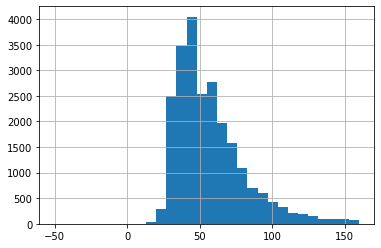

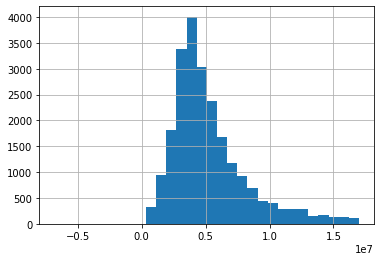

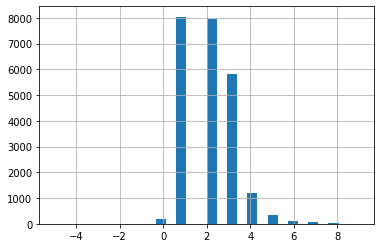

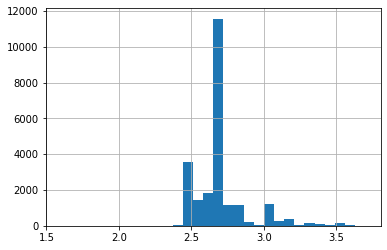

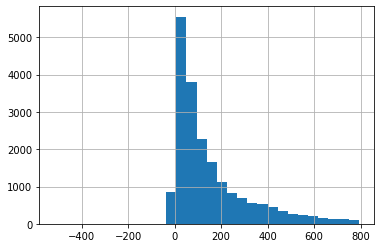

In [162]:
#Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Постройте гистограммы для каждого параметра.

import matplotlib.pyplot as plt

# IQR = Q 3 - Q 1
#Q1-3*IQR до Q3+3*IQR
# Сделаем функцию для создания графиков:

def print_hist(data,columns):
    median = data[columns].median()
    Q1 = data.loc[data[columns]<median][columns].median()
    Q3 = data.loc[data[columns]>median][columns].median()
    IQR = Q3-Q1
    data[columns].hist(bins=30,range=(Q1-3*IQR, Q3+3*IQR ))
    plt.show()
#

print_hist(data,'total_area')
print_hist(data,'last_price')
print_hist(data,'rooms')
print_hist(data,'ceiling_height')
print_hist(data,'days_exposition')

In [163]:
#Изучите время продажи квартиры. Постройте гистограмму. 
#Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. 
#Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
median_days_exposition = data['days_exposition'].median()
mean_days_exposition = data['days_exposition'].mean()
#print(median_days_exposition,mean_days_exposition)
# Распределение времени продажи не похоже на типичное распределение
# Очень много быстрых продаж, которые происходят в срок до 95 дней
# После 1200 дней продажи проиходят очень редко
# В среднем продажа занимает - 180 дней
print(median_days_exposition, mean_days_exposition)

95.0 180.88863436982163


count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

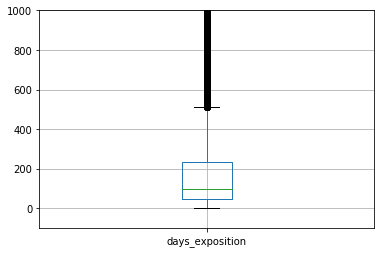

In [164]:
# есть задание "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.""
# В рамках предобработки - предобаботанно большенство аномалиций

data_days_exposition = data['days_exposition']
frame_data_days_exposition = data_days_exposition.to_frame()

plt.ylim(-100, 1000)
frame_data_days_exposition.boxplot()

data['days_exposition'].describe()

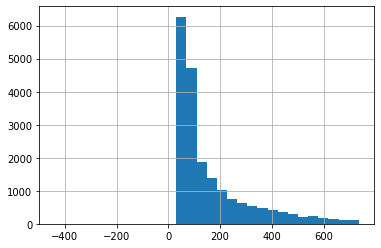

In [166]:
# Аномально много низких значений, добавим количество дней в объявление сверх быстрых продаж:
data.loc[data['days_exposition']<45,'days_exposition'] = data['days_exposition']+45

print_hist(data,'days_exposition')

Убрали аномально короткие продажи, очень длительный срок продажи объектов недвижимости - это не редкость, не трогаем слишком большие значения. 

In [167]:
# Какие факторы больше всего влияют на стоимость квартиры? 
# Посмотрим на факторы определяющую стоимость квартиры, как на абслютный показатель цены, так и на относительный: цена/м2
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,weekday_exposition,share_living,share_kitchen
total_images,1.000000,0.104473,0.115352,0.099288,0.053617,0.011061,0.102366,0.031340,0.039860,-2.930300e-02,...,-0.008347,0.011323,-0.003034,-0.028003,0.132780,0.140411,0.005043,-0.010433,0.000542,-2.468881e-02
last_price,0.104473,1.000000,0.653675,0.363343,0.293069,-0.006869,0.585658,0.026576,0.000640,-2.536178e-02,...,-0.016414,0.208621,-0.084809,0.080708,0.736499,-0.043089,0.002779,0.001550,0.002394,-7.585284e-02
total_area,0.115352,0.653675,1.000000,0.758344,0.394376,-0.075532,0.945860,-0.024754,-0.007836,-7.265329e-02,...,-0.021497,0.200294,-0.097969,0.146845,0.301960,-0.079912,0.004920,-0.004695,0.133136,-2.967388e-01
rooms,0.099288,0.363343,0.758344,1.000000,0.245642,-0.227813,0.827606,-0.150862,-0.005338,-1.472861e-01,...,-0.054549,0.121276,-0.057689,0.123427,0.055420,-0.055418,-0.004469,-0.004134,0.462484,-5.532161e-01
ceiling_height,0.053617,0.293069,0.394376,0.245642,1.000000,-0.085217,0.378091,-0.045692,-0.034365,1.112659e-02,...,-0.057852,0.214624,-0.106847,0.110874,0.291909,-0.053129,-0.003065,-0.022403,0.001241,-9.625248e-03
floors_total,0.011061,-0.006869,-0.075532,-0.227813,-0.085217,1.000000,-0.159252,0.675150,-0.004029,6.929074e-02,...,0.097460,-0.049557,0.038818,-0.050449,0.148242,0.007708,0.016490,0.013286,-0.348756,3.300417e-01
living_area,0.102366,0.585658,0.945860,0.827606,0.378091,-0.159252,1.000000,-0.089506,-0.005439,-5.649014e-02,...,-0.049107,0.183479,-0.084046,0.141413,0.232218,-0.072508,-0.000371,-0.004148,0.396402,-4.464883e-01
floor,0.031340,0.026576,-0.024754,-0.150862,-0.045692,0.675150,-0.089506,1.000000,-0.006182,3.694028e-02,...,0.073045,-0.029710,0.024850,-0.038494,0.129068,0.004915,0.019387,0.012347,-0.252910,2.298508e-01
is_apartment,0.039860,0.000640,-0.007836,-0.005338,-0.034365,-0.004029,-0.005439,-0.006182,1.000000,3.568805e-03,...,-0.018743,-0.009392,0.019909,-0.060567,0.006406,0.216585,0.111619,0.008751,0.001449,3.354499e-03
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.011127,0.069291,-0.056490,0.036940,0.003569,1.000000e+00,...,0.009134,-0.009690,0.002606,-0.020509,0.015636,0.011961,0.000976,-0.000843,0.085745,9.752658e-18


<font color=blue> Здорово, найдены основные параметры, влияющие на цену квартиры.
    
---


Цена больше всего зависит: от площади корреляция 0.65
количества комнат, корреляция 0.36
высоты потолков, корреляция 0.29
Слабо но ещё значимо от наличия в близи парков и водоёмов корреляция 0.20

Цена за м2 одинакого зависит от 
абсолютной площади,
высоты потолков,
от наличия в близи парков и водоёмов
у всех корреляция почти 0.3

In [168]:
#Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
print(data['last_price'].corr(data['total_area'])) # Сильная корелляция 0,65
print(data['last_price'].corr(data['rooms'])) # Корреляция ниже средней 0,36
print(data['last_price'].corr(data['cityCenters_nearest'])) # отрицательная корреляция... 0,2

0.6536750579657244
0.36334284996489546
-0.20738122461796146


In [37]:
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
print(data.groupby('type_floor')['last_price'].mean())
# Дороже всего на последнем этаже
# Дешевле всего на другом типа этажа (не первый и не последний)

type_floor
другой       6.676061e+06
первый       4.803560e+06
последний    7.356777e+06
Name: last_price, dtype: float64


In [169]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года.
print(data.groupby('weekday_exposition')['last_price'].mean()) # Зависимости - нет
print(data.groupby('month_exposition')['last_price'].mean()) # Значимой зависимости - нет
print(data.groupby('year_exposition')['last_price'].mean()) 
# в 2015 году резко подорожали квартиры почти в 8 раз
# в 2016 цену упали на 20% и до 2018 года включительно, они падали
# в 2019 начался умеренный рост цен

weekday_exposition
0    6.511613e+06
1    6.394233e+06
2    6.627970e+06
3    6.708663e+06
4    6.372131e+06
5    6.976804e+06
6    6.246180e+06
Name: last_price, dtype: float64
month_exposition
1     6.668233e+06
2     6.468500e+06
3     6.359275e+06
4     6.737198e+06
5     6.600435e+06
6     6.310269e+06
7     6.649337e+06
8     6.350233e+06
9     6.825470e+06
10    6.235013e+06
11    6.461363e+06
12    7.011731e+06
Name: last_price, dtype: float64
year_exposition
2014    1.208714e+07
2015    8.572833e+06
2016    6.827912e+06
2017    6.585729e+06
2018    5.950966e+06
2019    6.782388e+06
Name: last_price, dtype: float64


In [170]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений.
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

top = data['locality_name'].value_counts().head(10)
top10locatity = top.index
series_top10locatity = pd.Series(top10locatity)

#не работает эта часть (я не понял почему):
#print(series_top10locatity)
#top10 = data.query('locality_name in @series_top10locatity')
#############################


for element in series_top10locatity:
    sellect_data = data.loc[data['locality_name']==element]
    mean_price_per_square_meter = sellect_data['price_per_square_meter'].mean()
    print('Средняя цена в',element,mean_price_per_square_meter)
    

Средняя цена в санкт-петербург 114849.00879387381
Средняя цена в муринно 86087.51204970534
Средняя цена в кудрово 95324.93054392203
Средняя цена в шушары 78677.3642167513
Средняя цена в всеволожск 68654.4739860316
Средняя цена в пушкин 103125.81929072196
Средняя цена в колпино 75424.57909803945
Средняя цена в парголовый 90175.91345801107
Средняя цена в гатчина 68746.14676333922
Средняя цена в выборг 58141.90915331862


Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
Самый дорогой Санкт-питербург
Самые дешевые в выборге
в выборке из топ 10 городов по кол-ву объявлений

In [171]:
#Эти данные можно найти по имени в столбце 'locality_name'.
#Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 
#Выделите квартиры в Санкт-Петербурге ('locality_name'). 
spb_data = data.loc[data['locality_name']=='санкт-петербург']

#Ваша задача — выяснить, какая область входит в центр. 
#Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.

spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest']//1000
spb_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,weekday_exposition,type_floor,share_living,share_kitchen,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,755.0,NaN,120370.370370,2019,3,3,другой,0.472222,0.231481,16.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,574.0,558.0,92785.714286,2015,8,3,другой,0.612500,0.148214,13.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,89.797718,9,True,...,234.0,424.0,408176.100629,2015,7,4,другой,0.564766,0.187355,6.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,48.0,121.0,100000.000000,2018,6,1,другой,0.320000,0.410000,8.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,40.437211,22,True,...,NaN,NaN,110544.692737,2019,4,3,другой,0.564766,0.263966,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.300000,4,True,...,652.0,74.0,100566.572238,2018,2,2,другой,0.461756,0.257790,16.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.000000,2,True,...,NaN,60.0,105769.230769,2018,7,3,другой,0.596154,0.115385,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.300000,7,True,...,806.0,519.0,129903.978052,2016,10,3,другой,0.552812,0.145405,4.0
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.300000,3,True,...,381.0,NaN,72490.845228,2017,3,1,другой,0.547792,0.103356,4.0


In [121]:
#После этого посчитайте среднюю цену для каждого километра. 
print(spb_data.groupby('cityCenters_nearest_km')['last_price'].mean()) 

cityCenters_nearest_km
0.0     2.344232e+07
1.0     1.885085e+07
2.0     1.616331e+07
3.0     1.343683e+07
4.0     1.363202e+07
5.0     1.530612e+07
6.0     1.438911e+07
7.0     1.279767e+07
8.0     8.445272e+06
9.0     6.426055e+06
10.0    6.376092e+06
11.0    6.378591e+06
12.0    5.972820e+06
13.0    6.022927e+06
14.0    5.769469e+06
15.0    5.545776e+06
16.0    5.527928e+06
17.0    4.865574e+06
18.0    5.334929e+06
19.0    4.678756e+06
20.0    6.365864e+06
21.0    5.183239e+06
22.0    5.425513e+06
23.0    4.126867e+06
24.0    3.862235e+06
25.0    4.014913e+06
26.0    3.575000e+06
27.0    8.300000e+06
28.0    4.910500e+06
29.0    3.833333e+06
Name: last_price, dtype: float64


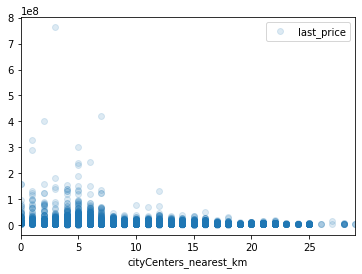

In [172]:
#Постройте график: он должен показывать, как цена зависит от удалённости от центра. 
#Определите границу, где график сильно меняется — это и будет центральная зона.

spb_data_sort = spb_data.sort_values(by = 'last_price', ascending = False)
spb_data_sort.plot(x='cityCenters_nearest_km', y='last_price',style='o', alpha=0.15) 
plt.show()

<font color=blue> Центр выбран верным образом.
    
---


In [138]:
#Центр - это до 7 км от центра

#Выделите сегмент квартир в центре. 
centres_spb_data = spb_data.loc[spb_data['cityCenters_nearest_km']<7]

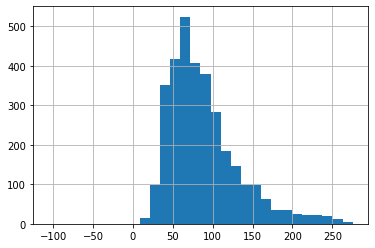

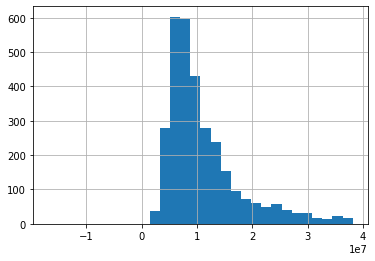

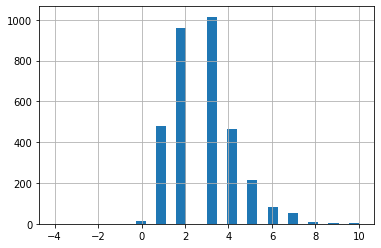

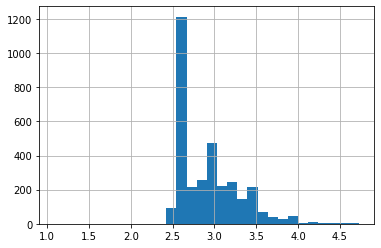

In [173]:
#Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 

print_hist(centres_spb_data,'total_area')
print_hist(centres_spb_data,'last_price')
print_hist(centres_spb_data,'rooms')
print_hist(centres_spb_data,'ceiling_height')

In [175]:
#Также выделите факторы, которые влияют на стоимость квартиры 
#(число комнат, этаж, удалённость от центра, дата размещения объявления).
print(data['last_price'].corr(data['rooms'])) # Сильная корелляция 0,65
print(data['last_price'].corr(data['floor'])) # Почти нет зависимости, корреляция 0,02
print(data['last_price'].corr(data['cityCenters_nearest'])) # отрицательная корреляция 0,2


centres_spb_data.corr()

0.36334284996489546
0.0265756432844708
-0.20738122461796146


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,year_exposition,month_exposition,weekday_exposition,share_living,share_kitchen,cityCenters_nearest_km
total_images,1.000000,0.135332,0.097170,0.052936,0.104711,-0.053557,0.081231,-0.007238,0.106376,-0.025008,...,-0.015698,-0.007978,-0.032699,0.157024,0.139857,-0.009312,0.003989,-0.015951,0.034288,-0.023542
last_price,0.135332,1.000000,0.607578,0.309873,0.145336,0.045679,0.536935,0.122465,0.012685,-0.022285,...,0.090362,-0.072806,0.061441,0.794463,-0.039843,-0.011148,0.028178,-0.010122,-0.073140,-0.047106
total_area,0.097170,0.607578,1.000000,0.727687,0.261018,-0.012531,0.948102,0.110854,0.018906,-0.052113,...,-0.002132,-0.067790,0.138642,0.235522,-0.075806,-0.024201,0.013305,0.139045,-0.300777,-0.080972
rooms,0.052936,0.309873,0.727687,1.000000,0.220969,-0.174557,0.789973,-0.030995,0.019896,-0.114174,...,-0.042692,-0.053213,0.129904,-0.009839,-0.059515,-0.030645,-0.009031,0.405967,-0.465066,-0.162591
ceiling_height,0.104711,0.145336,0.261018,0.220969,1.000000,-0.250029,0.282641,-0.129828,-0.025057,0.033427,...,0.006623,-0.071892,0.088243,0.080960,0.037748,-0.017773,-0.047419,0.141172,-0.118573,-0.174598
floors_total,-0.053557,0.045679,-0.012531,-0.174557,-0.250029,1.000000,-0.101241,0.646766,-0.026985,-0.005168,...,-0.042940,0.062846,0.017190,0.125107,-0.040465,0.020399,0.028464,-0.327382,0.164497,0.329014
living_area,0.081231,0.536935,0.948102,0.789973,0.282641,-0.101241,1.000000,0.040067,0.024368,-0.040406,...,-0.006234,-0.062095,0.133984,0.168151,-0.072661,-0.019067,0.003796,0.394353,-0.420562,-0.118893
floor,-0.007238,0.122465,0.110854,-0.030995,-0.129828,0.646766,0.040067,1.000000,-0.020105,-0.021519,...,-0.050622,0.032467,0.027817,0.134954,-0.034161,0.020894,0.040212,-0.190001,0.044205,0.204891
is_apartment,0.106376,0.012685,0.018906,0.019896,-0.025057,-0.026985,0.024368,-0.020105,1.000000,-0.007677,...,0.009835,0.024042,-0.068180,0.021827,0.209855,0.100813,0.007991,0.009740,0.014490,-0.024170
studio,-0.025008,-0.022285,-0.052113,-0.114174,0.033427,-0.005168,-0.040406,-0.021519,-0.007677,1.000000,...,0.006654,0.024175,-0.037717,-0.001232,0.008581,0.014381,0.005881,0.064284,0.009994,0.009122


In [ ]:
#Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

# Влияние на стоимость различных факторов не отличается значимым образом по выборке из СПБ по сравнению со всеобщей выборкой

В СПБ гораздо меньшее влияние на стоимость оказывают парки и водоёмы, а так же высота потолков

По прежнему самое большое значение, на цену оказывает площадь и количетсво комнат
Число комнат корреляция 0,3
Площадь корреляция 0,6
Чем дальше квартира от центра - тем она дешевле. 

### Шаг 5. Общий вывод

Были предобработаны данные, убраны аномальные данные, пропуски заменены, там где это логически можно сделать, на логически адекватные величины.

Была выявлена зависимость цены от факторов, которые влияют на её формирование по генеральной выборке из всего архива,
и так же отдельно по СПБ.

Вывод к которому можно прийти, очень прост: на стоимость больше всего влияет площадь и количество комнат, удалённость от центра

Это одинаково и для недвижимости, которая находиться в центре крупных городов и не в очень крупных населённых пунктах
Однако в центре крупных городов - в среднем квартиры дороже. 

В центре крупных городов, намного ниже влияние наличия парков и водоёмов на стоимость жилья, а так же высоты потолков